In [1]:
import rasterio as rio
import numpy as np
import utm
import matplotlib.pyplot as plt
from common import *
import os
import gpxpy
import scipy.io as sio
import pickle
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

def find_dist(l,cellsize):
    a = np.linalg.norm((l[2]-l[0])*cellsize)**2 + np.linalg.norm((l[3]-l[1])*cellsize)**2
    return np.sqrt(a)

class Dataset(torch.utils.data.Dataset):
    '''
    Generating dataset out of numpy arrays
    '''
    def __init__(self, X, y):
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        device = torch.device("cpu")
        self.x_data = torch.tensor(X, dtype=torch.float32).to(device)
        self.y_data = torch.tensor(y, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        preds = self.x_data[idx,:]  # or just [idx]
        out_y = self.y_data[idx,:]
        return (preds, out_y)       # tuple of two matrices


tx1_ebc_X = np.load("./files_generated_by_process_data_scripts/tx1_ebc_X.npy", allow_pickle=True)
print("1")
tx1_ebc_y = np.load("./files_generated_by_process_data_scripts/tx1_ebc_y.npy", allow_pickle=True)
print("2")
#tx2_ustar_X = np.load("./files_generated_by_process_data_scripts/tx2_ustar_X.npy", allow_pickle=True)
#print("3")
#tx2_ustar_y = np.load("./files_generated_by_process_data_scripts/tx2_ustar_y.npy", allow_pickle=True)
#print("4")
tx3_X = np.load("./files_generated_by_process_data_scripts/tx3_X.npy", allow_pickle=True)
print("5")
tx3_y = np.load("./files_generated_by_process_data_scripts/tx3_y.npy", allow_pickle=True)
print("6")
tx4_X = np.load("./files_generated_by_process_data_scripts/tx4_X.npy", allow_pickle=True)
print("7")
tx4_y = np.load("./files_generated_by_process_data_scripts/tx4_y.npy", allow_pickle=True)
print("8")
tx5_X = np.load("./files_generated_by_process_data_scripts/tx5_X.npy", allow_pickle=True)
print("9")
tx5_y = np.load("./files_generated_by_process_data_scripts/tx5_y.npy", allow_pickle=True)
print("10")
tx6_X = np.load("./files_generated_by_process_data_scripts/tx6_X.npy", allow_pickle=True)
print("11")
tx6_y = np.load("./files_generated_by_process_data_scripts/tx6_y.npy", allow_pickle=True)
print("12")

#print(tx1_ebc_y)
#print(tx1_ebc_X)
max_length = 0
max_elev = 0
min_elev = 100000
max_x_coord = 0
max_y_coord = 0
for i in range(len(tx1_ebc_X[0])):
    l = len(tx1_ebc_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx1_ebc_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx1_ebc_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx1_ebc_X[0][i][0]
    dummy_max_coord_x2 = tx1_ebc_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx1_ebc_X[0][i][1]
    dummy_max_coord_y2 = tx1_ebc_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y
    


'''
print(max_length)
print(max_elev)
print(max_x_coord)
print(max_y_coord)
for i in range(len(tx2_ustar_X[0])):
    l = len(tx2_ustar_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx2_ustar_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx2_ustar_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx2_ustar_X[0][i][0]
    dummy_max_coord_x2 = tx2_ustar_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx2_ustar_X[0][i][1]
    dummy_max_coord_y2 = tx2_ustar_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y

'''

print(max_length)
print(max_elev)
print(max_x_coord)
print(max_y_coord)
for i in range(len(tx3_X[0])):
    l = len(tx3_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx3_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx3_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx3_X[0][i][0]
    dummy_max_coord_x2 = tx3_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx3_X[0][i][1]
    dummy_max_coord_y2 = tx3_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y
        
print(max_length)
print(max_elev)
print(max_x_coord)
print(max_y_coord)
for i in range(len(tx4_X[0])):
    l = len(tx4_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx4_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx4_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx4_X[0][i][0]
    dummy_max_coord_x2 = tx4_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx4_X[0][i][1]
    dummy_max_coord_y2 = tx4_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y
        
print(max_length)
print(max_elev)
print(max_x_coord)
print(max_y_coord)
for i in range(len(tx5_X[0])):
    l = len(tx5_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx5_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx5_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx5_X[0][i][0]
    dummy_max_coord_x2 = tx5_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx5_X[0][i][1]
    dummy_max_coord_y2 = tx5_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y

print(max_length)
print(max_elev)
print(max_x_coord)
print(max_y_coord)
for i in range(len(tx6_X[0])):
    l = len(tx6_X[2][i])
    if l>max_length:
        max_length = l
    dummy_max = max(tx6_X[2][i])
    if dummy_max>max_elev:
        max_elev = dummy_max
    dummy_min = min(tx6_X[2][i])
    if dummy_min<min_elev:
        min_elev = dummy_min
    dummy_max_coord_x1 = tx6_X[0][i][0]
    dummy_max_coord_x2 = tx6_X[1][i][0]
    dummy_x = max([dummy_max_coord_x1, dummy_max_coord_x2])
    if dummy_x>max_x_coord:
        max_x_coord = dummy_x

    dummy_max_coord_y1 = tx6_X[0][i][1]
    dummy_max_coord_y2 = tx6_X[1][i][1]
    dummy_y = max([dummy_max_coord_y1, dummy_max_coord_y2])
    if dummy_y>max_y_coord:
        max_y_coord = dummy_y



print(max_length)
print(max_elev)
print(min_elev)
print(max_x_coord)
print(max_y_coord)



for i in range(len(tx1_ebc_X[0])):
    tx1_ebc_X[2][i] =(tx1_ebc_X[2][i]-min_elev)/(max_elev-min_elev)

    tx1_ebc_X[0][i][0] /=max_x_coord
    tx1_ebc_X[1][i][0] /=max_x_coord

    tx1_ebc_X[0][i][1] /= max_y_coord
    tx1_ebc_X[1][i][1] /= max_y_coord

'''
for i in range(len(tx2_ustar_X[0])):
    tx2_ustar_X[2][i] =(tx2_ustar_X[2][i]-min_elev)/(max_elev-min_elev)

    tx2_ustar_X[0][i][0] /=max_x_coord
    tx2_ustar_X[1][i][0] /=max_x_coord

    tx2_ustar_X[0][i][1] /= max_y_coord
    tx2_ustar_X[1][i][1] /= max_y_coord
''' 

for i in range(len(tx3_X[0])):
    tx3_X[2][i] =(tx3_X[2][i]-min_elev)/(max_elev-min_elev)
    

    tx3_X[0][i][0] /=max_x_coord
    tx3_X[1][i][0] /=max_x_coord

    tx3_X[0][i][1] /= max_y_coord
    tx3_X[1][i][1] /= max_y_coord
    
for i in range(len(tx4_X[0])):
    tx4_X[2][i] =(tx4_X[2][i]-min_elev)/(max_elev-min_elev)
    

    tx4_X[0][i][0] /=max_x_coord
    tx4_X[1][i][0] /=max_x_coord

    tx4_X[0][i][1] /= max_y_coord
    tx4_X[1][i][1] /= max_y_coord
    
for i in range(len(tx5_X[0])):
    tx5_X[2][i] =(tx5_X[2][i]-min_elev)/(max_elev-min_elev)


    tx5_X[0][i][0] /=max_x_coord
    tx5_X[1][i][0] /=max_x_coord

    tx5_X[0][i][1] /= max_y_coord
    tx5_X[1][i][1] /= max_y_coord
    
    
for i in range(len(tx6_X[0])):
    tx6_X[2][i] =(tx6_X[2][i]-min_elev)/(max_elev-min_elev)
    

    tx6_X[0][i][0] /=max_x_coord
    tx6_X[1][i][0] /=max_x_coord

    tx6_X[0][i][1] /= max_y_coord
    tx6_X[1][i][1] /= max_y_coord
        
        
for i in range(len(tx1_ebc_X[0])):
    original_array = tx1_ebc_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx1_ebc_X[2][i] = padded_array

'''
for i in range(len(tx2_ustar_X[0])):
    original_array = tx2_ustar_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx2_ustar_X[2][i] = padded_array
'''
    
for i in range(len(tx3_X[0])):
    original_array = tx3_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx3_X[2][i] = padded_array

for i in range(len(tx4_X[0])):
    original_array = tx4_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx4_X[2][i] = padded_array

for i in range(len(tx5_X[0])):
    original_array = tx5_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx5_X[2][i] = padded_array

for i in range(len(tx6_X[0])):
    original_array = tx6_X[2][i]
    desired_length = max_length
    padding_length = desired_length - len(original_array)
    padded_array = np.pad(original_array, (0, padding_length), mode='constant', constant_values=0)
    tx6_X[2][i] = padded_array



C:\Users\serha\anaconda3\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1
2
5
6
7
8
9
10
11
12
3000
1532.989990234375
9369
12485
3001
1555.8599853515625
10165
12545
3001
1555.8599853515625
10165
12545
3001
1555.8599853515625
10165
12545
3001
1555.8599853515625
1420.9200439453125
10165
12545


In [2]:
y_comb = np.append(tx1_ebc_y, tx3_y)
y_comb = np.append(y_comb, tx4_y)
y_comb = np.append(y_comb, tx5_y)
y_comb = np.array(np.append(y_comb, tx6_y))
print(y_comb)

[-47.66349203 -47.14166991 -45.54033234 ... -77.95405804 -74.83297452
 -72.32397533]


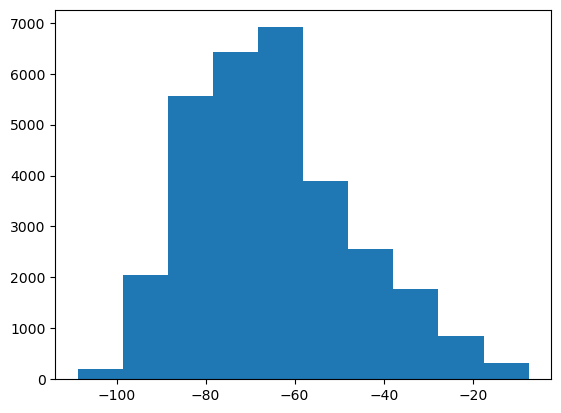

In [3]:
plt.figure()
plt.hist(y_comb)
plt.show()

In [4]:
comb1 = np.append(tx1_ebc_X[0], tx3_X[0])
comb1 = np.append(comb1, tx4_X[0])
comb1 = np.append(comb1, tx5_X[0])
comb1 = np.append(comb1, tx6_X[0])
comb1 = np.array([np.array(sublist) for sublist in comb1])

comb2 = np.append(tx1_ebc_X[1], tx3_X[1])
comb2 = np.append(comb2, tx4_X[1])
comb2 = np.append(comb2, tx5_X[1])
comb2 = np.append(comb2, tx6_X[1])
comb2 = np.array([np.array(sublist) for sublist in comb2])

comb3 = np.append(tx1_ebc_X[2], tx3_X[2])
comb3 = np.append(comb3, tx4_X[2])
comb3 = np.append(comb3, tx5_X[2])
comb3 = np.append(comb3, tx6_X[2])
comb3 = np.array([np.array(sublist) for sublist in comb3])


#combined_conditional_info = np.array([comb1, comb2, comb3])
#print(combined_conditional_info)
#combined_array = np.concatenate((tx1_ebc_X, tx2_ustar_X, tx6_X), axis=0)
#print(tx1_ebc_X)


combined_array = np.concatenate((np.concatenate((comb1, comb2), axis=1), comb3), axis=1)


#data_loader = torch.utils.data.DataLoader(

#    datasets.MNIST('./', train=True, download=True,
#                   transform=transforms.Compose([
#                       transforms.ToTensor(),
#                       transforms.Normalize(
#                           (0.5,), (0.5,))
#                   ])),
#    batch_size=training_parameters["batch_size"], shuffle=True)

l = len(y_comb)
idx = np.random.permutation(l)
val_percent = 0
test_percent = 0.3
len1 = np.ceil(l * (1 - (test_percent+val_percent)))
len1 = int(len1)
len2 = np.ceil(l * (1 - (test_percent)))-len1
len2 = int(len2)
len3 = int(l-len1-len2)


#X[X.abs()> 1e308] = 0
#X[X.abs() == float("+inf")] = 0.0
#X[X.abs() == float("-inf")] = 0.0
#X[X.abs() == float("nan")] = 0.0

train_X = combined_array[idx[0:len1]]
test_X = combined_array[idx[len1+len2:]]

#train_X2 = comb2[idx[0:len1]]
#test_X2 = comb2[idx[len1+len2:]]

#train_X3 = comb3[idx[0:len1]]
#test_X3 = comb3[idx[len1+len2:]]

train_y = y_comb[idx[0:len1]]
test_y = y_comb[idx[len1+len2:]]


ds_train = Dataset(train_X, train_y)
ds_test = Dataset(test_X, test_y)


print(len(combined_array[0,:]))

3005


In [5]:
dist_gt = []
for i in range(len(combined_array)):
    dist_gt.append(find_dist([combined_array[i, 0]*max_x_coord,combined_array[i,1]*max_y_coord,combined_array[i,2]*max_x_coord,combined_array[i,3]*max_y_coord], 0.5))

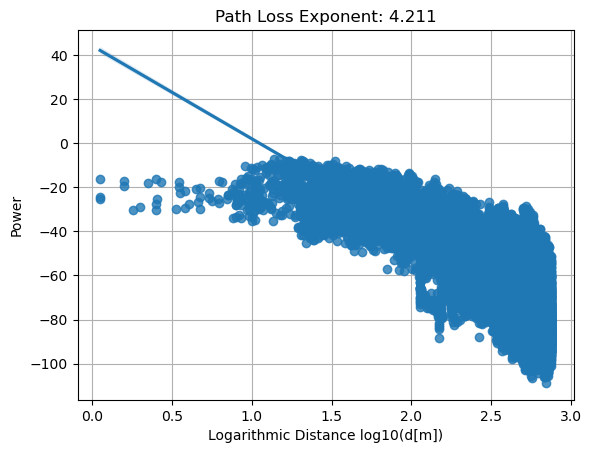

In [6]:
import seaborn as sns
sns.reset_orig()
a, b = np.polyfit(np.log10(dist_gt), y_comb, 1)
plt.figure()
ax = sns.regplot(x=np.log10(dist_gt), y=y_comb)
ax.set_axisbelow(True)

plt.title("Path Loss Exponent: %.3f" %abs(a/10))
plt.xlabel("Logarithmic Distance log10(d[m])")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [7]:
class Dataset2(torch.utils.data.Dataset):
    '''
    Generating dataset out of numpy arrays
    '''
    def __init__(self, X):

        device = torch.device("cpu")
        self.x_data = torch.tensor(X, dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        preds = self.x_data[idx,:]  # or just [idx]
        return preds       # tuple of two matrices



In [8]:
idx = np.random.permutation(l)
val_percent = 0
test_percent = 0.3
len1 = np.ceil(l * (1 - (test_percent+val_percent)))
len1 = int(len1)
len2 = np.ceil(l * (1 - (test_percent)))-len1
len2 = int(len2)
len3 = int(l-len1-len2)

training_parameters = {
    "n_epochs": 20,
    "batch_size": 8,
}

#X[X.abs()> 1e308] = 0
#X[X.abs() == float("+inf")] = 0.0
#X[X.abs() == float("-inf")] = 0.0
#X[X.abs() == float("nan")] = 0.0

train_X = comb3[idx[0:len1]]
test_X = comb3[idx[len1+len2:]]

#train_X2 = comb2[idx[0:len1]]
#test_X2 = comb2[idx[len1+len2:]]

#train_X3 = comb3[idx[0:len1]]
#test_X3 = comb3[idx[len1+len2:]]

ds_train = Dataset2(train_X)
ds_test = Dataset2(test_X)

train_ldr = torch.utils.data.DataLoader(ds_train, batch_size=training_parameters["batch_size"], shuffle=False)
test_ldr = torch.utils.data.DataLoader(ds_test, batch_size=1)
#test_ldr = torch.utils.data.DataLoader(ds_test, batch_size=1)
num_batches = len(train_ldr)
print("Number of batches: ",num_batches)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


Number of batches:  2672
cpu


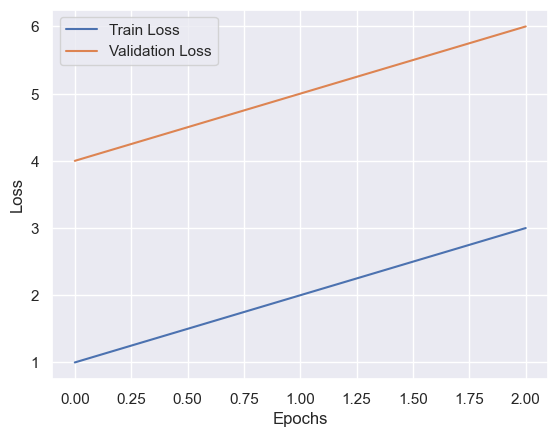

In [17]:

train_loss = [1,2,3]
val_loss = [4,5,6]
plt.figure()
sns.set_theme()
plt.plot(train_loss)
plt.plot(val_loss)
ax = plt.gca()
ax.set_axisbelow(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.grid(True)
plt.show()


        

0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.004011419326602691
Val Loss: 0.0019577437720021745
0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.0017996200493329154
Val Loss: 0.0019530401219085246
0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.0014843864849675167
Val Loss: 0.0013038912334323231
0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.0012523706010649116
Val Loss: 0.0014241553355761815
0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.00114839723401727
Val Loss: 0.0009441915157969634
0.0
0.18712574850299402
0.37425149700598803
0.561377245508982
0.7485029940119761
0.9356287425149701
Train Loss: 0.0011223170055279683
Val Loss: 0.0012388187080772351
0.0
0.1

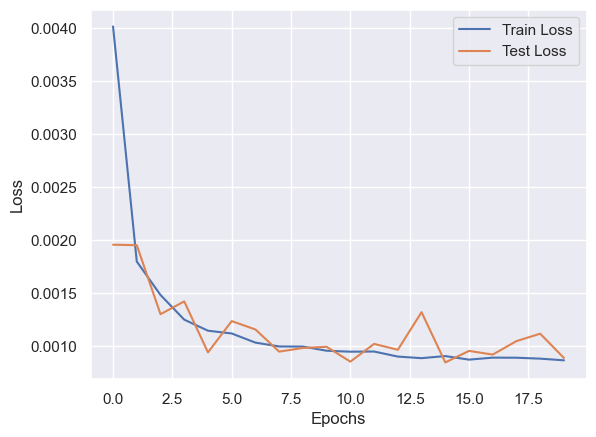

In [20]:
class AEModel(nn.Module):
    def __init__(self):
        super(AEModel, self).__init__()
        input_dim = 3001
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )

    def forward(self,x):
        output = self.encoder(x)
        output = self.decoder(output)
        return output
    
ae = AEModel()
ae.to(device)
ae_optimizer = optim.Adam(ae.parameters(), lr=0.002)
loss = nn.MSELoss()
n_epochs = 20
batch_size = training_parameters["batch_size"]
train_loss_list = []
test_loss_list = []
for epoch_idx in range(n_epochs):
    dummy_loss_train=0
    dummy_loss_val=0
    for batch_idx, batch in enumerate(train_ldr):
        if batch_idx % 500 ==0:
            print(batch_idx/len(train_ldr))
        X_ = batch  # (predictors, targets)
        ae_optimizer.zero_grad()  # prepare gradients
        oupt = ae(X_)  # predicted output

        loss_val = loss(oupt, X_)  # avg per item in batch
        dummy_loss_train+=loss_val.item()
        loss_val.backward()  # compute gradients
        ae_optimizer.step()  # update wts

            #print(loss_val)

        #print(f"Testing - Epoch: %d", epoch)
    for (batch_idx, batch) in enumerate(test_ldr):
        ae.eval()
        X_ = batch  # (predictors, targets)
        oupt = ae(X_)  # predicted prices

        loss_val = loss(oupt, X_)  # avg per item in batch
        dummy_loss_val+=loss_val.item()
        #print(dummy_loss_test)
        #test_loss_list.append(loss_val)
        #if epoch == max_epochs - 1:
        #    print(f"Testing loss:", loss_val)


        #print(loss_val)
    train_loss = dummy_loss_train/len(train_ldr)
    train_loss_list.append(train_loss)
    print("Train Loss: " + str(train_loss))
    test_loss = dummy_loss_val/len(test_ldr)
    test_loss_list.append(test_loss)
    print("Val Loss: " + str(test_loss))
    #scheduler.step(val_loss)


plt.figure()
sns.set_theme()
plt.plot(train_loss_list)
plt.plot(test_loss_list)
ax = plt.gca()
ax.set_axisbelow(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Test Loss"])
plt.grid(True)
plt.show()


        

## Encoder Features Used in GAN

In [45]:
train_X = combined_array[idx]
#test_X = combined_ar

#train_X2 = comb2[idx[0:len1]]
#test_X2 = comb2[idx[len1+len2:]]

#train_X3 = comb3[idx[0:len1]]
#test_X3 = comb3[idx[len1+len2:]]

train_y = y_comb[idx]
#test_y = y_comb[idx[len1+len2:]]


ds_train = Dataset(train_X, train_y)
#ds_test = Dataset(test_X, test_y)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
training_parameters = {
    "n_epochs": 20,
    "batch_size": 48,
}
train_ldr = torch.utils.data.DataLoader(ds_train, batch_size=training_parameters["batch_size"], shuffle=False)
#test_ldr = torch.utils.data.DataLoader(ds_test, batch_size=1)
#test_ldr = torch.utils.data.DataLoader(ds_test, batch_size=1)
num_batches = len(train_ldr)
print("Number of batches: ",num_batches)


from matplotlib import pyplot as plt

for x,y in train_ldr:
    print(x)
    #print(x2)
    #print(x3)
    #print(y)
    break


cpu
Number of batches:  637
tensor([[0.7801, 0.9913, 0.7132,  ..., 0.0000, 0.0000, 0.0000],
        [0.7801, 0.9913, 0.7504,  ..., 0.0000, 0.0000, 0.0000],
        [0.7801, 0.9913, 0.8268,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.8159, 0.9390, 0.7427,  ..., 0.0000, 0.0000, 0.0000],
        [0.7801, 0.9913, 0.8057,  ..., 0.0000, 0.0000, 0.0000],
        [0.8589, 0.8962, 0.7295,  ..., 0.0000, 0.0000, 0.0000]])


In [37]:
def find_dist(l,cellsize):
    a = np.linalg.norm((l[2]-l[0])*cellsize)**2 + np.linalg.norm((l[3]-l[1])*cellsize)**2
    return np.sqrt(a)

In [38]:
from torch import autograd
def gradient_penalty(D, fi, xr, xf, batch_size):
    """

    :param D:
    :param xr: [b, 2]
    :param xf: [b, 2]
    :return:
    """
    # [b, 1]
    t = torch.rand(batch_size, 1).cpu()
    # [b, 1] => [b, 2]  broadcasting so t is the same for x1 and x2
    t = t.expand_as(xr)
    # interpolation
    mid = t * xr + (1 - t) * xf
    # set it to require grad info
    mid.requires_grad_()

    pred = D(fi, mid).view(batch_size)
    grads = autograd.grad(outputs=pred, inputs=mid,
                          grad_outputs=torch.ones_like(pred),
                          create_graph=True, retain_graph=True, only_inputs=True)[0]

    gp = torch.pow(grads.norm(2, dim=1) - 1, 2).mean()

    return gp

In [39]:
def find_dist(l, cellsize):
    a = np.linalg.norm((l[2]-l[0])*cellsize)**2 + np.linalg.norm((l[3]-l[1])*cellsize)**2
    return np.sqrt(a)

## Put Abs in Relative Coords

0.0


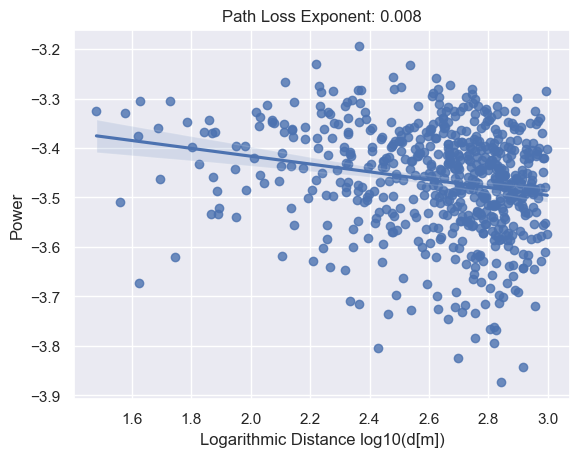

[0/100]: loss_d: 2.728, loss_g: 0.532, acc_real: 0.180, acc_fake: 0.000
0.0


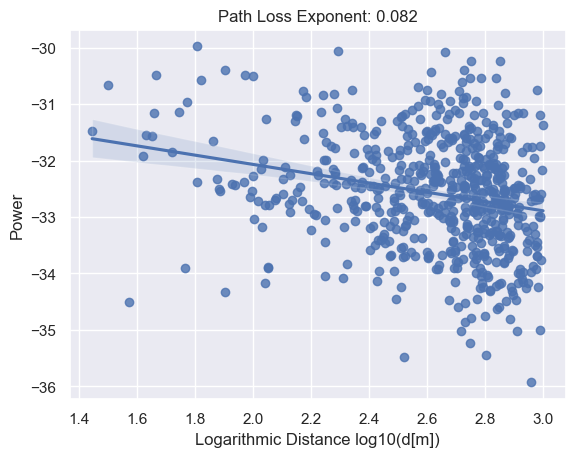

[1/100]: loss_d: 1.140, loss_g: 0.516, acc_real: 0.411, acc_fake: 0.104
0.0


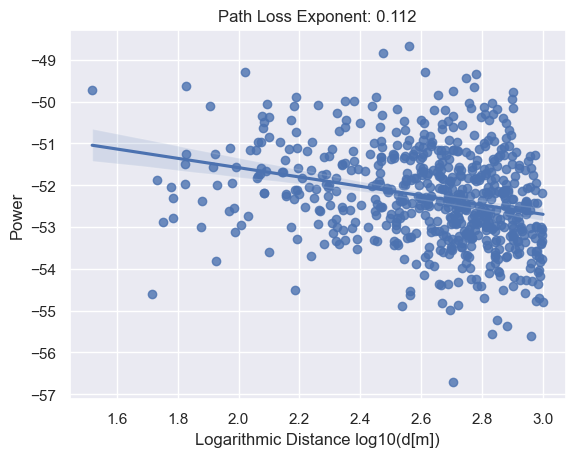

[2/100]: loss_d: 1.085, loss_g: 0.656, acc_real: 0.484, acc_fake: 0.195
0.0


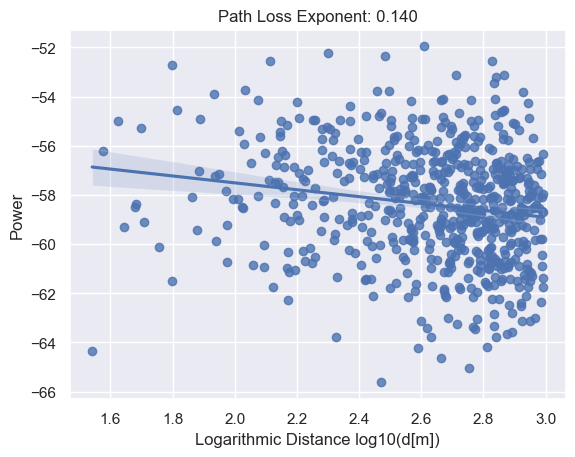

[3/100]: loss_d: 1.036, loss_g: 0.792, acc_real: 0.509, acc_fake: 0.284
0.0


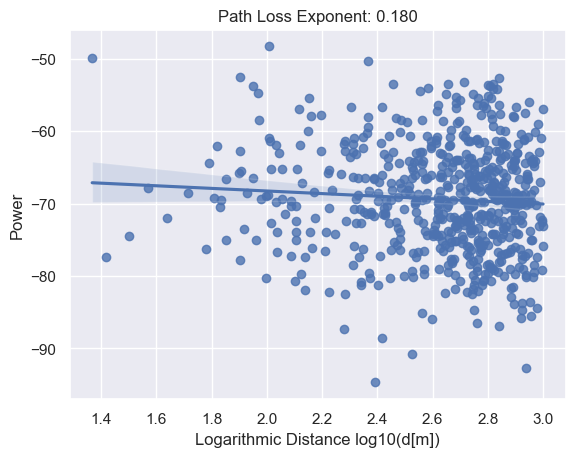

[4/100]: loss_d: 0.968, loss_g: 0.841, acc_real: 0.531, acc_fake: 0.357
0.0


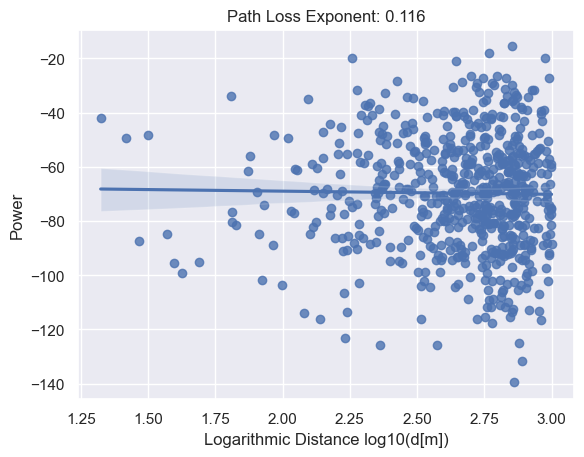

[5/100]: loss_d: 0.930, loss_g: 0.836, acc_real: 0.559, acc_fake: 0.411
0.0


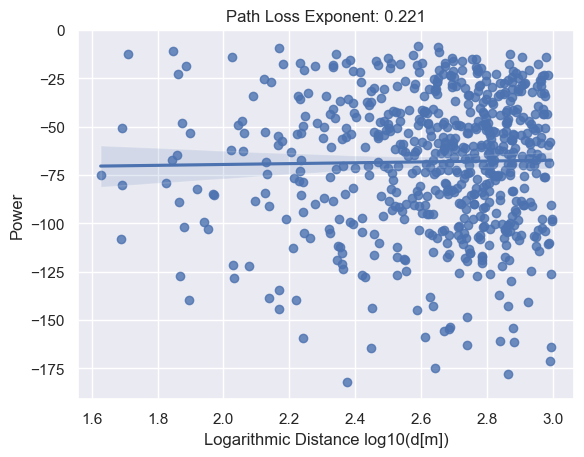

[6/100]: loss_d: 0.909, loss_g: 0.853, acc_real: 0.590, acc_fake: 0.452
0.0


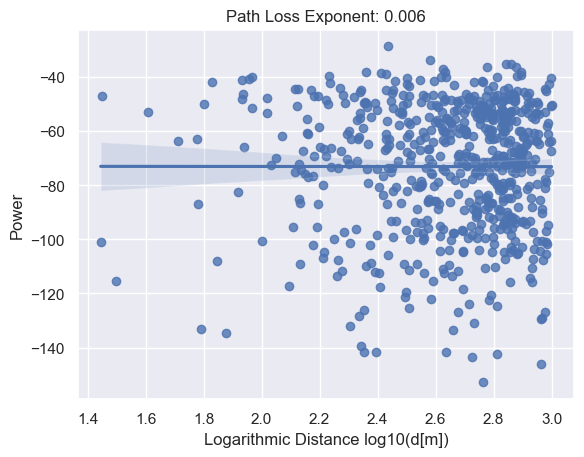

[7/100]: loss_d: 0.872, loss_g: 0.955, acc_real: 0.616, acc_fake: 0.491
0.0


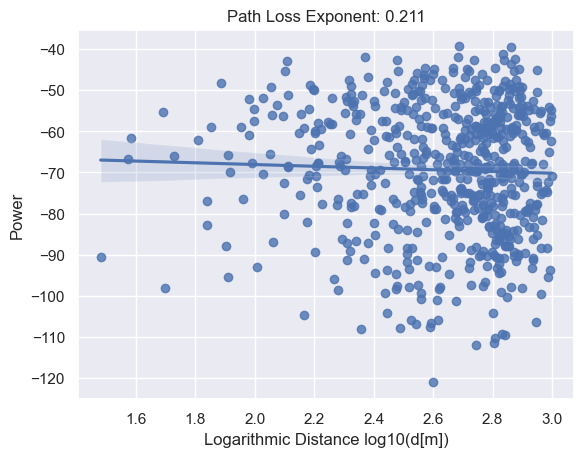

[8/100]: loss_d: 0.832, loss_g: 1.057, acc_real: 0.642, acc_fake: 0.523
0.0


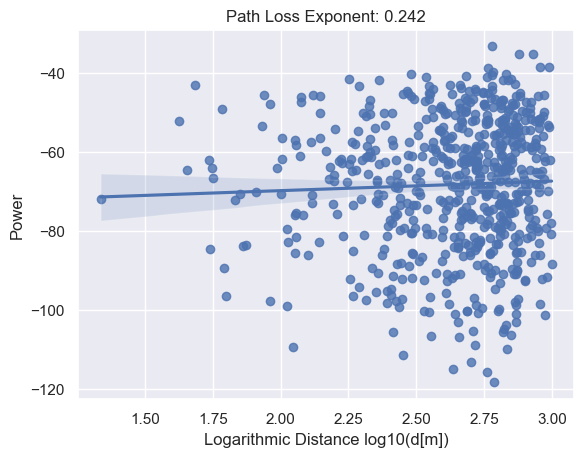

[9/100]: loss_d: 0.792, loss_g: 1.165, acc_real: 0.670, acc_fake: 0.549
0.0


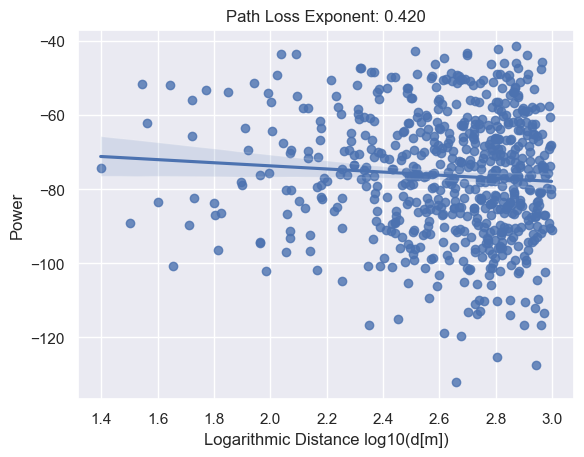

[10/100]: loss_d: 0.751, loss_g: 1.334, acc_real: 0.697, acc_fake: 0.570
0.0


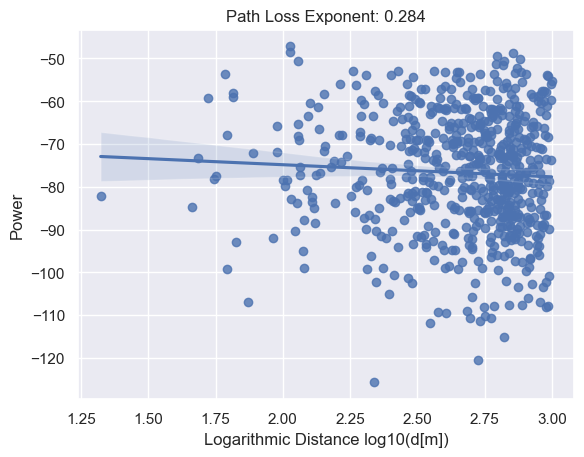

[11/100]: loss_d: 0.714, loss_g: 1.536, acc_real: 0.720, acc_fake: 0.589
0.0


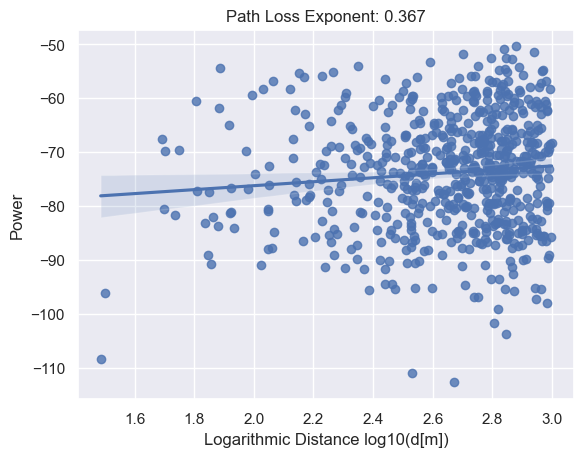

[12/100]: loss_d: 0.676, loss_g: 1.793, acc_real: 0.741, acc_fake: 0.605
0.0


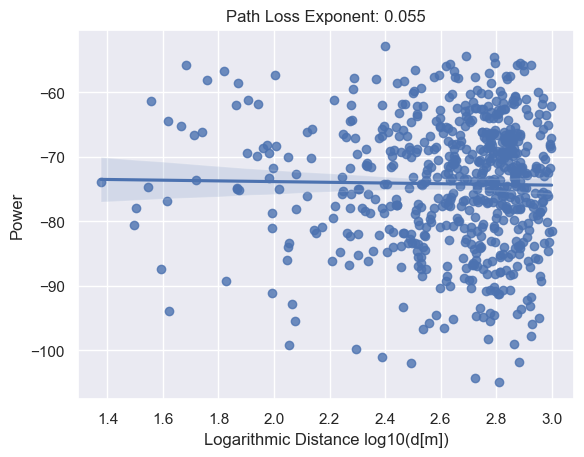

[13/100]: loss_d: 0.640, loss_g: 2.081, acc_real: 0.759, acc_fake: 0.621
0.0


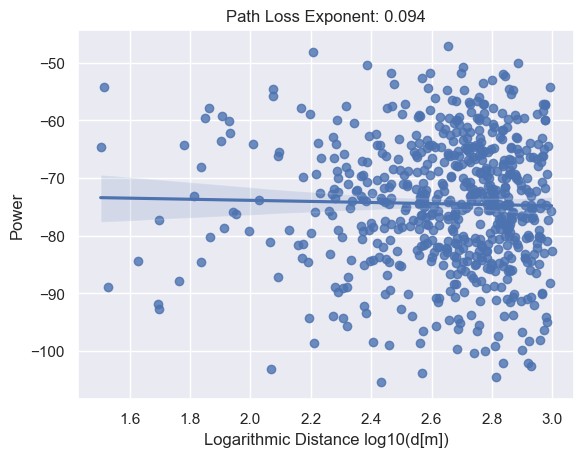

[14/100]: loss_d: 0.611, loss_g: 2.412, acc_real: 0.775, acc_fake: 0.635
0.0


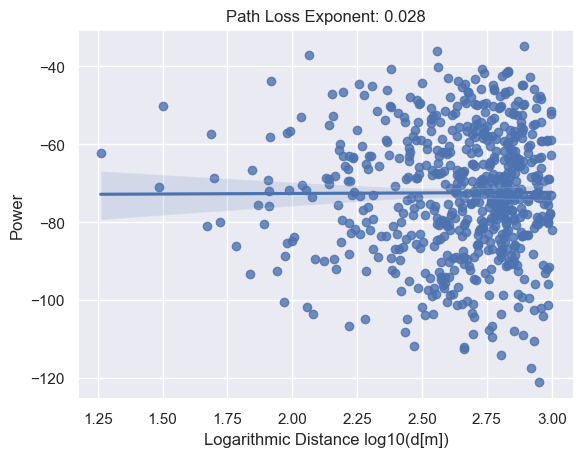

[15/100]: loss_d: 0.586, loss_g: 2.774, acc_real: 0.789, acc_fake: 0.648
0.0


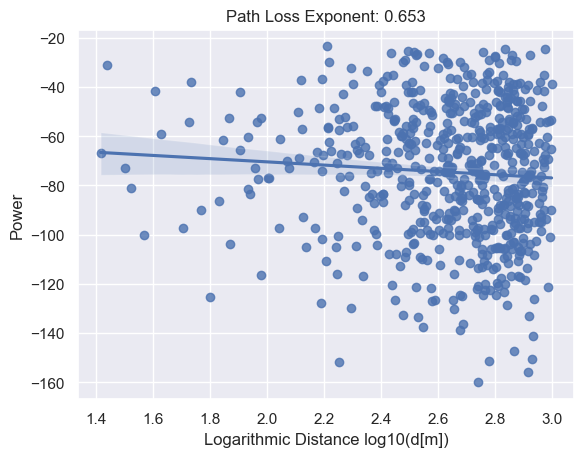

[16/100]: loss_d: 0.563, loss_g: 3.170, acc_real: 0.802, acc_fake: 0.660
0.0


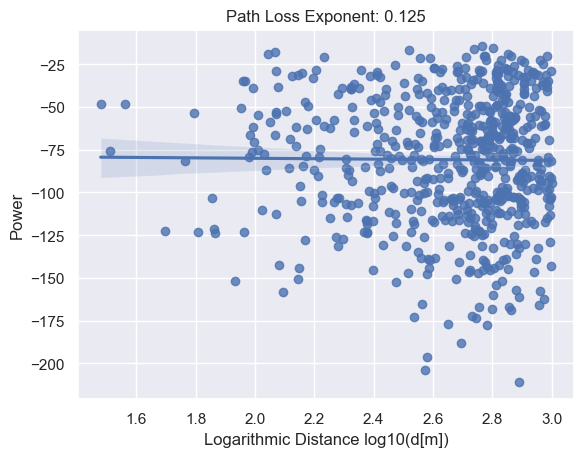

[17/100]: loss_d: 0.544, loss_g: 3.590, acc_real: 0.813, acc_fake: 0.671
0.0


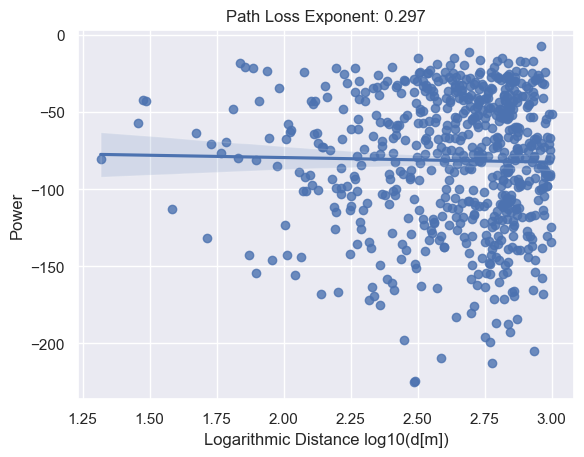

[18/100]: loss_d: 0.530, loss_g: 4.050, acc_real: 0.822, acc_fake: 0.681
0.0


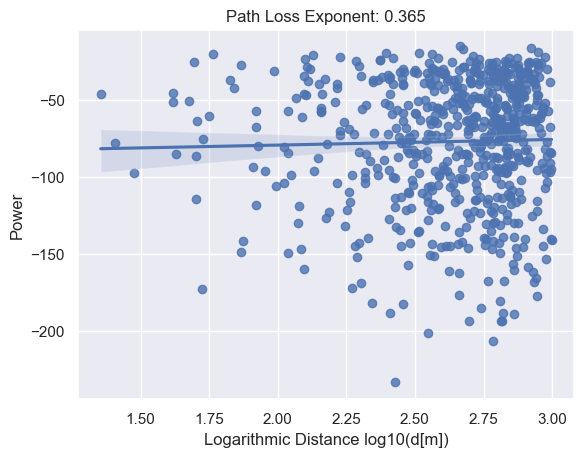

[19/100]: loss_d: 0.518, loss_g: 4.543, acc_real: 0.831, acc_fake: 0.691
0.0


KeyboardInterrupt: 

In [32]:
import seaborn as sns
def accuracy(output, target, threshold=0.5):
    with torch.no_grad():
        prediction = (output >= threshold).float()
        correct = (prediction == target).float().sum()
        accuracy = correct / len(target)
        return accuracy.item()


class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        embed_dim = 8
        input_dim = 8 + 2 + embed_dim
        output_dim = 1

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU()
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(32, 16)
        )
        self.hidden_layer3 = nn.Sequential(
            nn.Linear(16, output_dim)
        )

        self.ae = ae.encoder
        self.sigm = nn.Sigmoid()
    def forward(self, x, info):
        info_out = self.sigm(self.ae(info[:, 4:]))
        x = torch.cat([x, torch.abs(info[:,2]-info[:, 0]).unsqueeze(1), torch.abs(info[:, 3]-info[:, 1]).unsqueeze(1), info_out], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)

        return output.to(device)


class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        embed_dim = 8
        input_dim = 1 + 2 + embed_dim
        output_dim = 1

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(8, output_dim),
            nn.Sigmoid()
        )
        self.ae = ae.encoder
        self.sigm = nn.Sigmoid()
    def forward(self, x, info):
        x_out = self.sigm(self.ae(x[:, 4:]))
        x = torch.cat([torch.abs(x[:,2]-x[:, 0]).unsqueeze(1), torch.abs(x[:, 3]-x[:, 1]).unsqueeze(1), x_out, info], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)

        return output.to(device)


discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0001)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0003)

loss = nn.BCELoss()
noise_dim = 8
n_epochs = 100
batch_size = 32
G_loss_mean = []
D_loss_mean = []
D_real_mean = []
D_fake_mean = []
accuracy_real = []
accuracy_real_mean = []
accuracy_fake = []
accuracy_fake_mean = []
for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    D_real = []
    D_fake = []
    for batch_idx, data_input in enumerate(train_ldr):
        if data_input[1].shape[0]!=batch_size and batch_idx==len(train_ldr)-1:
            continue
        if batch_idx%1000 == 0:
            print(batch_idx/len(train_ldr))
        noise = torch.randn(batch_size, noise_dim).to(device)
        fake_info = torch.rand((batch_size,3005)).to(device)
        generated_data = generator(noise, fake_info)  # batch_size X 784

        # Discriminator
        true_data = data_input[0].view(batch_size, 3005).to(device)  # batch_size X 784
        cond_info = data_input[1].to(device)  # batch_size
        true_labels = torch.ones(batch_size).to(device)

        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, cond_info).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)
        acc_real = accuracy(discriminator_output_for_true_data, true_labels)
        discriminator_output_for_generated_data = discriminator(fake_info, generated_data.detach()).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        gp = gradient_penalty(discriminator, fake_info, cond_info, generated_data.detach(), batch_size)
        acc_fake = accuracy(discriminator_output_for_generated_data, torch.zeros(batch_size).to(device))
        discriminator_loss = (
                                     true_discriminator_loss + generator_discriminator_loss + 0.6*gp
                             ) / 2

        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        D_real.append(true_discriminator_loss)
        D_fake.append(generator_discriminator_loss)
        accuracy_real.append(acc_real)
        accuracy_fake.append(acc_fake)
        # Generator

        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise, fake_info)  # batch_size X 784
        discriminator_output_on_generated_data = discriminator(fake_info, generated_data).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()

        G_loss.append(generator_loss.data.item())


    dist_list =[]
    gan_rss_list = []
    with torch.no_grad():
        noise = torch.randn(1000, noise_dim).to(device)
        fake_info = torch.rand((1000,3005)).to(device)
        fake_info[:, [0,1,2,3]] = torch.zeros(1000, 4)
        fake_info[:, 2] = torch.rand((1000,))*0.14 + torch.logspace(-2.5, 0, 1000)
        #fake_info[:, 3] -= torch.logspace(0, 0.6, 1000)
        generated_data = generator(noise, fake_info).cpu().view(1000, 1)
        for i, x in enumerate(generated_data):
            fake_info_reconst = fake_info[i].detach().numpy()
            fake_info_reconst[0] *=max_x_coord
            fake_info_reconst[1] *=max_y_coord
            fake_info_reconst[2] *=max_x_coord
            fake_info_reconst[3] *=max_y_coord
            fake_info_reconst[4:] *= (max_elev-min_elev)
            fake_info_reconst[4:] += min_elev 
            d = find_dist(fake_info_reconst[:4], 0.5)
            if d<1000:
                dist_list.append(d)
                gan_rss_list.append(x.detach().numpy()[0])

            #dist_list.append(find_dist(fake_info_reconst, 0.5))
            #gan_rss_list.append(x.detach().numpy()[0])

    a, b = np.polyfit(np.log10(dist_list), gan_rss_list, 1)
    plt.figure()
    ax = sns.regplot(x=np.log10(dist_list), y=gan_rss_list)
    ax.set_axisbelow(True)
    plt.xlabel("Logarithmic Distance log10(d[m])")
    plt.ylabel("Power")
    plt.title("Path Loss Exponent: %.3f" %abs(a/10))
    plt.grid(True)
    plt.show()
    '''
    with torch.no_grad():
        noise = torch.randn(batch_size, noise_dim).to(device)
        fake_info = torch.rand((batch_size,18337)).to(device)
        generated_data = generator(noise, fake_info).cpu().view(batch_size, 1)
        for x in generated_data:
            fake_info_reconst = fake_info[0].detach().numpy()
            fake_info_reconst[0] *=max_x_coord
            fake_info_reconst[1] *=max_y_coord
            fake_info_reconst[2] *=max_x_coord
            fake_info_reconst[3] *=max_y_coord
            fake_info_reconst[4:] *= max_elev
            print(fake_info_reconst)
            print(x.detach().numpy())
            #plt.imshow(x.detach().numpy(), interpolation='nearest', cmap='gray')
            #plt.show()

            break
    '''
    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f, acc_real: %.3f, acc_fake: %.3f' % (
        (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss)), torch.mean(torch.FloatTensor(accuracy_real)), torch.mean(torch.FloatTensor(accuracy_fake))))
    G_loss_mean.append(torch.mean(torch.FloatTensor(G_loss)))
    D_loss_mean.append(torch.mean(torch.FloatTensor(D_loss)))
    D_real_mean.append(torch.mean(torch.FloatTensor(D_real)))
    D_fake_mean.append(torch.mean(torch.FloatTensor(D_fake)))
    accuracy_real_mean.append(torch.mean(torch.FloatTensor(accuracy_real)))
    accuracy_fake_mean.append(torch.mean(torch.FloatTensor(accuracy_fake)))


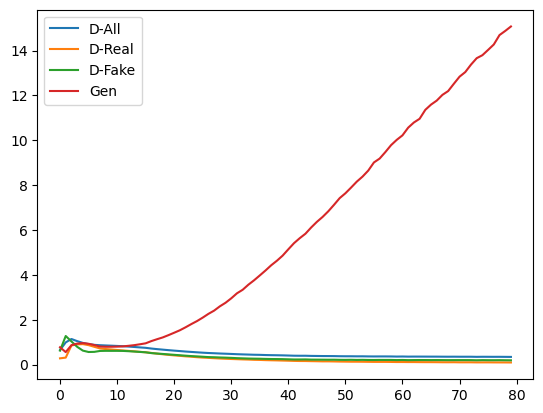

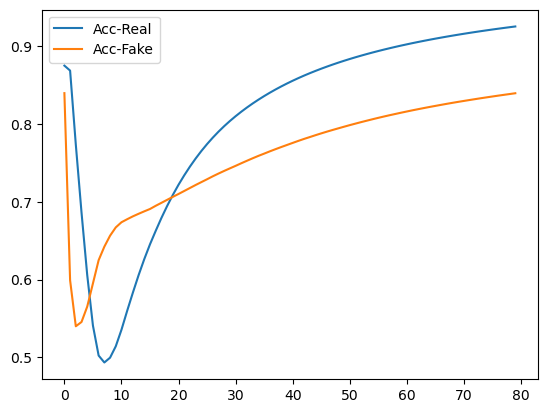

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(D_loss_mean)
plt.plot(D_real_mean)
plt.plot(D_fake_mean)
plt.plot(G_loss_mean)
plt.legend(["D-All", "D-Real", "D-Fake", "Gen"])
plt.show()

plt.figure()
plt.plot(accuracy_real_mean)
plt.plot(accuracy_fake_mean)
plt.legend(["Acc-Real", "Acc-Fake"])
plt.show()
